In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [42]:
df = pd.read_csv('glass.csv')

In [43]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [44]:
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [45]:
var_names

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [46]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [47]:
data

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [48]:
data = preprocessing.minmax_scale(data)
data

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

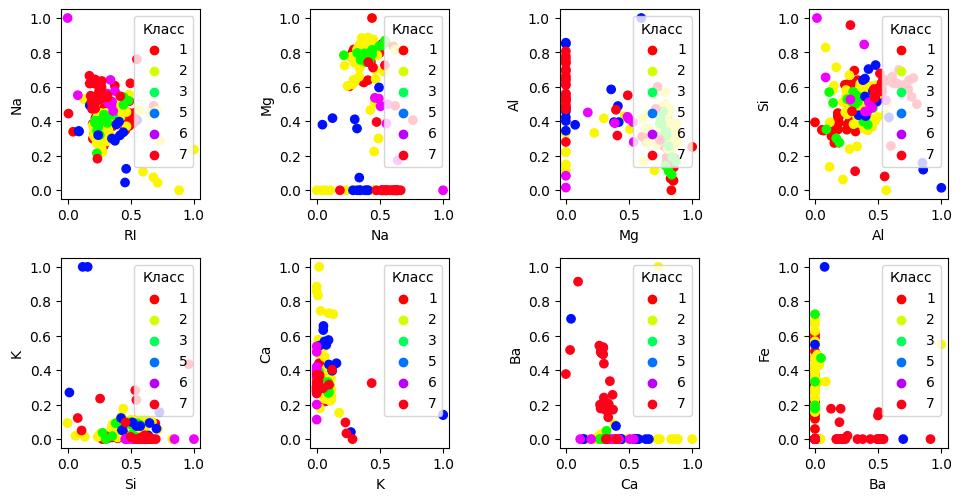

In [49]:
unique_labels = np.unique(labels)
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))

import matplotlib.pyplot as plt
unique_labels = np.unique(labels)
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))
fig, axs = plt.subplots(2,4)
fig. tight_layout (h_pad=2, w_pad=2)
from matplotlib.pyplot import figure

for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv') 
    axs[i // 4, i % 4].set_xlabel(var_names[i]) 
    axs[i // 4, i % 4].set_ylabel(var_names[i+1]) 
    fig.set_figheight(5)
    fig.set_figwidth(10)
    handles = []
    for label, color in zip(unique_labels, colors):
        handles.append(axs[i // 4, i % 4].scatter([], [], c=[color], label=str(label)))
    axs[i // 4, i % 4].legend(handles=handles, title="Класс", loc='upper right')
plt.show()

In [54]:
pca = PCA(n_components = 4)
pca_data = pca.fit(data).transform(data)
pca

PCA(n_components=4)

In [51]:
pca_data

array([[ 0.40210641,  0.0327067 , -0.16705036, -0.1921952 , -0.04276046],
       [ 0.20631979, -0.14470531, -0.08192307, -0.02054938, -0.0358561 ],
       [ 0.188617  , -0.1948536 , -0.04469616,  0.03446635, -0.00448895],
       ...,
       [-0.73947698, -0.14151154, -0.00193456, -0.11506093, -0.21339296],
       [-0.72370373, -0.22855798,  0.02649169, -0.02265264, -0.22455072],
       [-0.74101123, -0.21472512,  0.04000224, -0.08176274, -0.19572056]])

In [55]:
print(f'Объесненная дисперсия: {pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()}')
print(f'Собственные числа: {pca.singular_values_}')

Объесненная дисперсия: (array([0.45429569, 0.17990097, 0.12649459, 0.09797847]), np.float64(0.8586697305102716))
Собственные числа: [5.1049308  3.21245688 2.69374532 2.3707507 ]


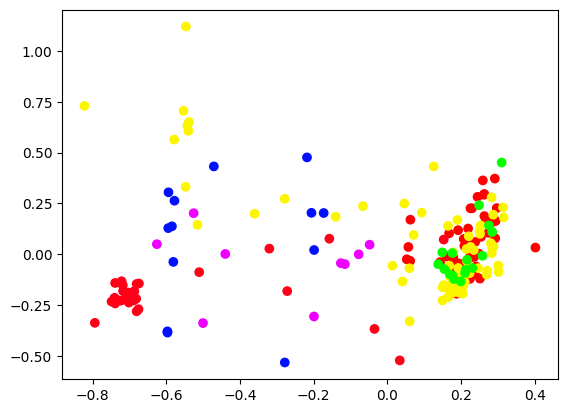

In [53]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

In [57]:
pca_data_new = pca.fit(pca_data).inverse_transform(pca_data)
pca_data_new

array([[ 4.02106406e-01,  3.27066975e-02, -1.67050356e-01,
        -1.92195203e-01],
       [ 2.06319788e-01, -1.44705307e-01, -8.19230734e-02,
        -2.05493779e-02],
       [ 1.88617003e-01, -1.94853604e-01, -4.46961577e-02,
         3.44663484e-02],
       [ 2.37208477e-01, -9.70644677e-02, -8.63357190e-02,
        -1.50685878e-02],
       [ 2.23972190e-01, -1.21779151e-01, -8.73951860e-02,
         5.32275854e-02],
       [ 2.38343376e-01,  6.01961887e-02,  4.04603720e-01,
         1.09362324e-01],
       [ 2.25779812e-01, -1.07449689e-01, -1.00098305e-01,
         6.05857463e-02],
       [ 2.34800324e-01, -9.28817916e-02, -1.10631803e-01,
         8.86689588e-02],
       [ 1.96420004e-01, -6.89746231e-02, -1.07524570e-01,
        -1.28297548e-01],
       [ 2.26074680e-01, -3.65788388e-03,  1.01949643e-01,
         6.90299055e-02],
       [ 2.09164891e-01,  4.00937901e-02,  3.68335095e-01,
         1.49791528e-01],
       [ 2.31471612e-01, -8.27551882e-02, -8.90323459e-02,
      